In [1]:
import numpy as np  
import pandas as pd 

In [2]:
 df = pd.read_csv("uber.csv")  

In [3]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [4]:
df.shape

(200000, 9)

In [5]:
df.size

1800000

In [6]:
df = df.drop(columns=['Unnamed: 0','key'])

In [7]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [8]:
df.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [9]:
df['dropoff_latitude'] = df['dropoff_latitude'].fillna(df['dropoff_latitude'].mean())
df['dropoff_longitude'] = df['dropoff_longitude'].fillna(df['dropoff_longitude'].median())

In [10]:
df.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [12]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   fare_amount        200000 non-null  float64            
 1   pickup_datetime    200000 non-null  datetime64[ns, UTC]
 2   pickup_longitude   200000 non-null  float64            
 3   pickup_latitude    200000 non-null  float64            
 4   dropoff_longitude  200000 non-null  float64            
 5   dropoff_latitude   200000 non-null  float64            
 6   passenger_count    200000 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(1)
memory usage: 10.7 MB


In [14]:
df = df.assign(hour = df['pickup_datetime'].dt.hour,
               day = df['pickup_datetime'].dt.day,
               month = df['pickup_datetime'].dt.month,
               year = df['pickup_datetime'].dt.year,
               dayOfWeek = df['pickup_datetime'].dt.dayofweek)

In [15]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayOfWeek
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,19,7,5,2015,3
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,20,17,7,2009,4
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,21,24,8,2009,0
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,8,26,6,2009,4
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,17,28,8,2014,3


In [16]:
df.drop(['pickup_datetime'],axis = 1,inplace=True)

In [17]:
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayOfWeek
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,19,7,5,2015,3
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,20,17,7,2009,4
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,21,24,8,2009,0
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,8,26,6,2009,4
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,17,28,8,2014,3


In [18]:
from math import *

def haversine_distance(lat1, lon1, lat2, lon2):
    # Convert latitude and longitude from degrees to radians
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])

    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    # Radius of Earth in kilometers (you can use 3958.8 for miles)
    radius = 6371.0

    # Calculate the distance
    distance = radius * c

    return distance

In [19]:
df['distance'] = df.apply(lambda row: haversine_distance(row['pickup_latitude'], row['pickup_longitude'], row['dropoff_latitude'], row['dropoff_longitude']), axis=1)

In [20]:
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayOfWeek,distance
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,19,7,5,2015,3,1.683323
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,20,17,7,2009,4,2.457590
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,21,24,8,2009,0,5.036377
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,8,26,6,2009,4,1.661683
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,17,28,8,2014,3,4.475450


In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

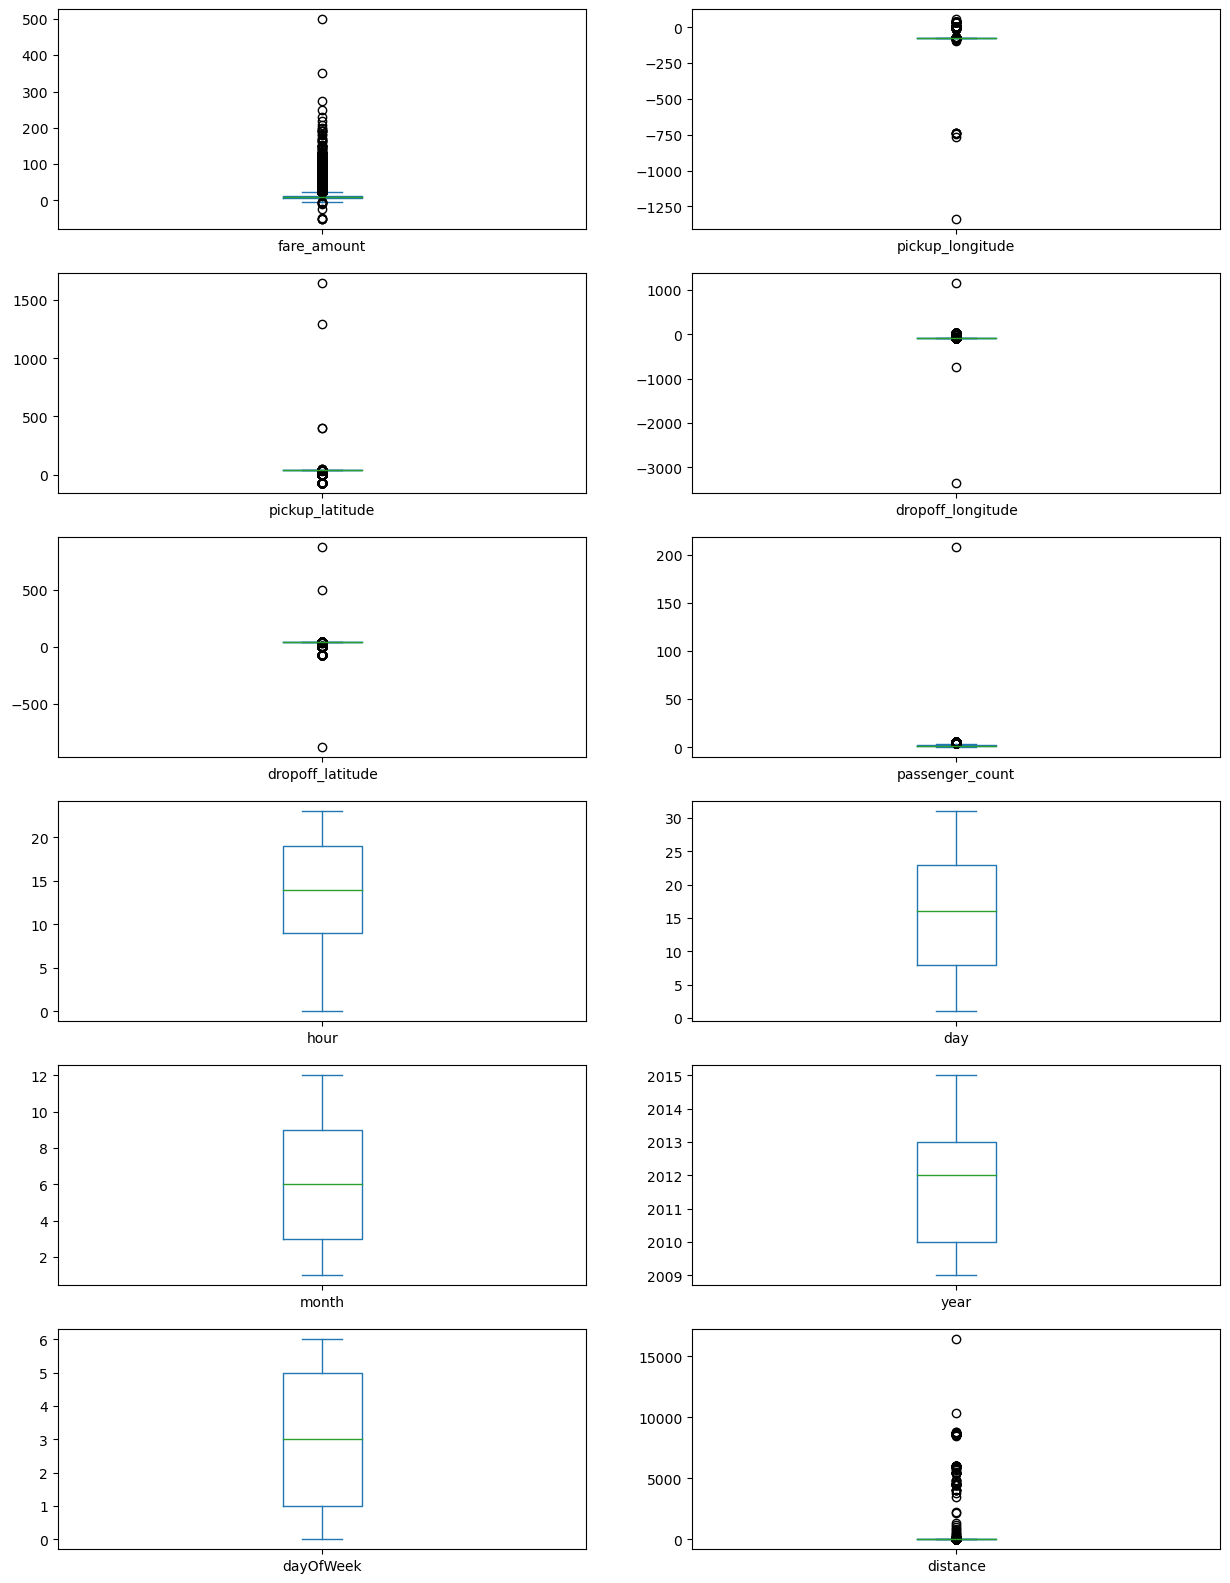

In [22]:
df.plot(kind = "box" , subplots = True , layout = (6,2) ,figsize = (15,20))
plt.show()

In [23]:
def remove_outliers(dframe,col):
    q1 = dframe[col].quantile(0.25)
    q3 = dframe[col].quantile(0.75)
    iqr = q3 - q1
    
    lower_bound = q1 - 1.5*iqr
    upper_bound = q1 + 1.5*iqr
    
    dframe[col] = np.clip(dframe[col] , lower_bound , upper_bound)
    
    return dframe

def treat_all_outliers(df1 , col_list):
    for c in col_list:
        df1 = remove_outliers(df1,c)
    return df1


In [24]:
df = treat_all_outliers(df , df.iloc[:,:])

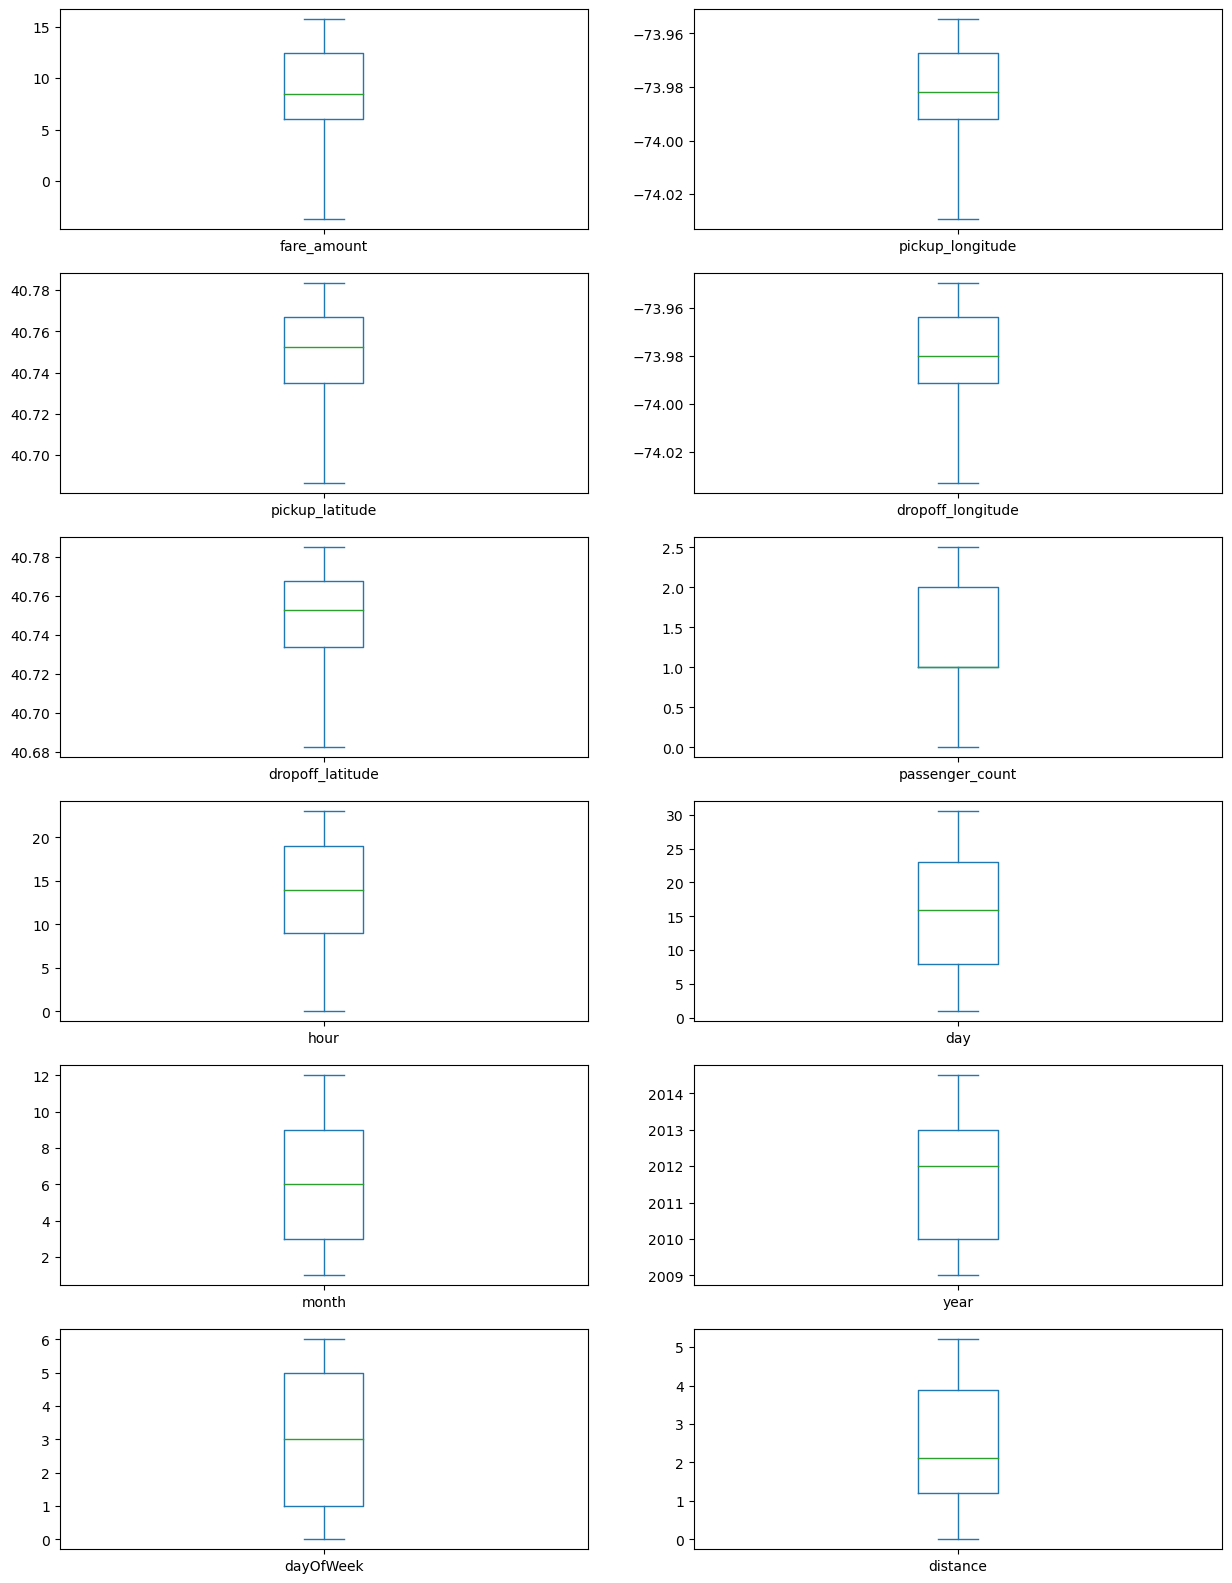

In [25]:
df.plot(kind = "box" , subplots = True , layout = (6,2) ,figsize = (15,20))
plt.show()

In [26]:
corr = df.corr()

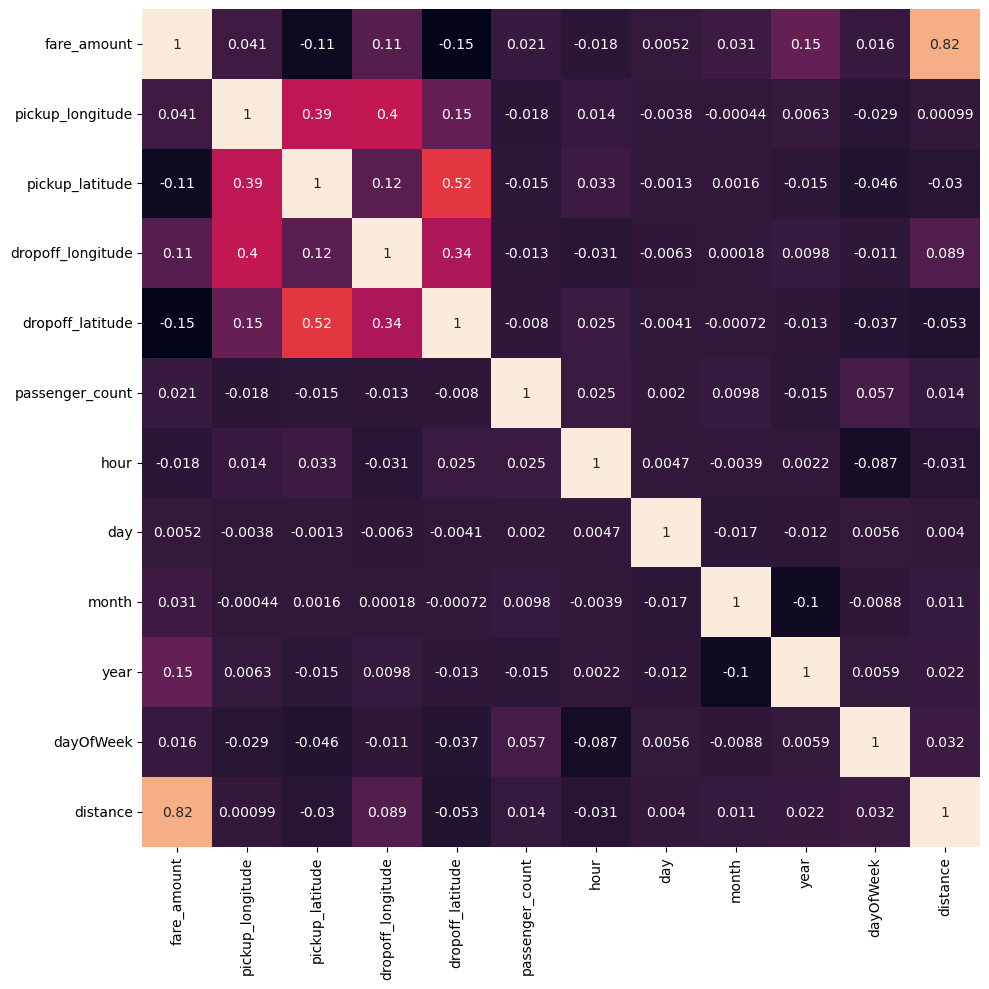

In [27]:
plt.figure(figsize = (10,10))
sns.heatmap(corr , annot = True,cbar = False)
plt.tight_layout()

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X = df.drop(columns=['fare_amount'])
y = df['fare_amount']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=65)

In [31]:
# Linear model
from sklearn.linear_model import LinearRegression

In [32]:
lr = LinearRegression()

In [33]:
lr.fit(X_train,y_train)

LinearRegression()

In [34]:
y_pred_lr = lr.predict(X_test)

In [35]:
from sklearn.ensemble import RandomForestRegressor

In [36]:
rf = RandomForestRegressor()

In [37]:
rf.fit(X_train,y_train)

RandomForestRegressor()

In [38]:
y_pred_rf  = rf.predict(X_test)

In [39]:
from sklearn.metrics import r2_score , mean_squared_error

In [40]:
lr_rmse = np.sqrt(mean_squared_error(y_test , y_pred_lr))
lr_r2 = r2_score(y_test,y_pred_lr)

In [41]:
rf_rmse = np.sqrt(mean_squared_error(y_test,y_pred_rf))
rf_r2 = r2_score(y_test,y_pred_rf)

In [42]:
final_res = pd.DataFrame(columns=['Model','R2_score','RMSE'])

In [46]:
final_res = final_res.append(pd.Series({"Model":"Liner","R2_score":lr_r2,"RMSE":lr_rmse}),ignore_index=True)

C:\Users\reliance\AppData\Local\Temp\ipykernel_2220\1812901942.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_res = final_res.append(pd.Series({"Model":"Liner","R2_score":lr_r2,"RMSE":lr_rmse}),ignore_index=True)


In [48]:
final_res.append(pd.Series({"Model":"rf","R2_score":rf_r2,"RMSE":rf_rmse}),ignore_index=True)

C:\Users\reliance\AppData\Local\Temp\ipykernel_2220\3387550165.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_res.append(pd.Series({"Model":"rf","R2_score":rf_r2,"RMSE":rf_rmse}),ignore_index=True)


,Model,R2_score,RMSE
0,Liner,0.705853,2.165434
1,rf,0.783210,1.859013
